In [1]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 

In [148]:
def plot_qc(image, mask, patient_id ='test'):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-15::5]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]]*200, cmap = 'afmhot')
        axs[i, 2].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(mask[..., idx[i]]*5000, alpha= 0.4, cmap = 'afmhot')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'{patient_id}.png', dpi=300, transparent=True)
    plt.plot()

In [154]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-08-0520/CT1_SEG.nii.gz')
image = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-08-0520/T1.nii.gz')

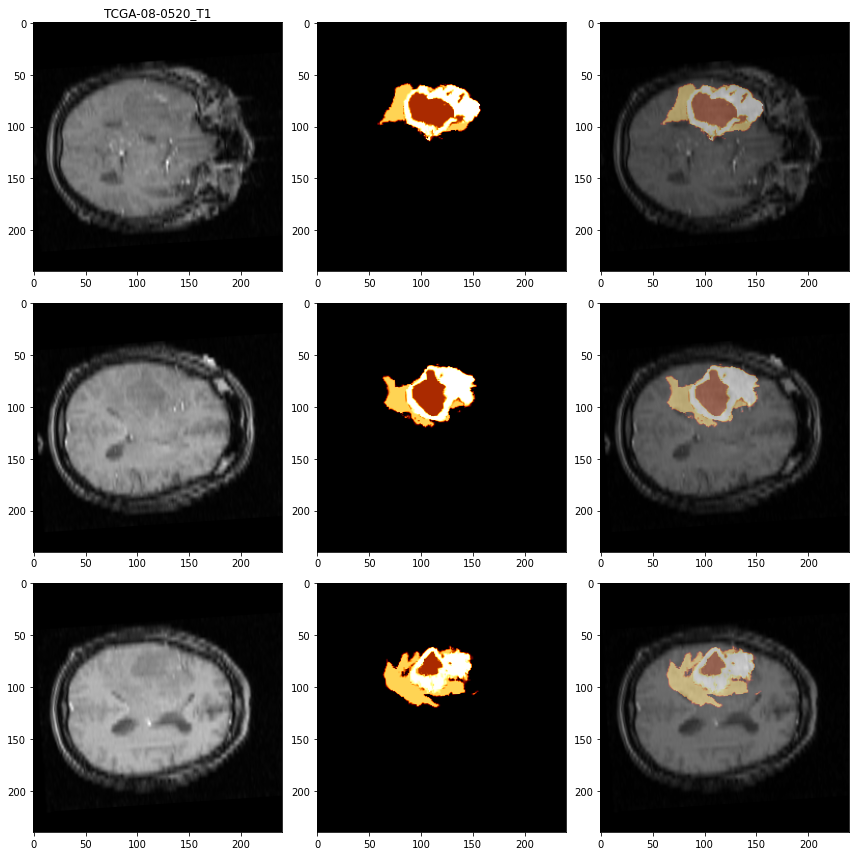

In [155]:
plot_qc(image, mask, patient_id ='TCGA-08-0520_T1')

In [39]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/schw/2a_interp/VS-SEG-206/T1_SEG.nii.gz')
image = ants.image_read('/anvar/public_datasets/preproc_study/schw/2a_interp/VS-SEG-206/T1.nii.gz')

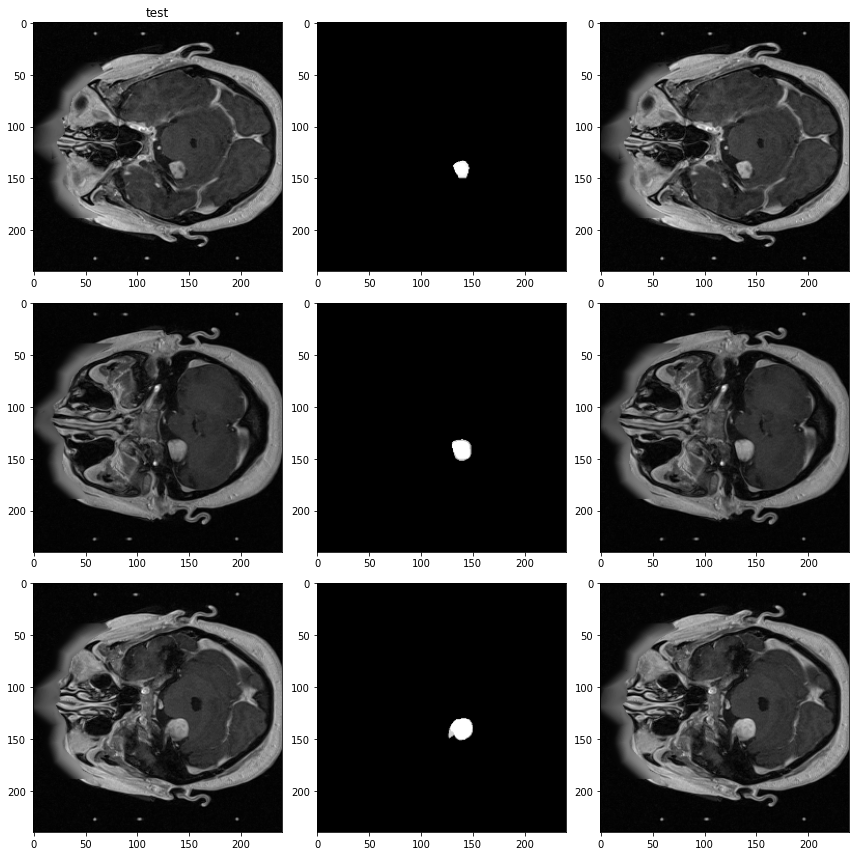

In [40]:
plot_qc(image, mask, patient_id ='test')

In [9]:
np.unique(mask.numpy())

array([0.00000000e+00, 5.27588185e-04, 1.14111835e-03, 1.64483371e-03,
       1.71167741e-03, 2.00531259e-03, 2.34828447e-03, 2.80743744e-03,
       2.94828671e-03, 3.17507819e-03, 3.94139392e-03, 3.99391400e-03,
       4.54537477e-03, 4.56447341e-03, 4.83423565e-03, 5.05784387e-03,
       5.09683602e-03, 6.33583264e-03, 6.71779690e-03, 6.84670964e-03,
       6.87058270e-03, 7.41726905e-03, 8.48915614e-03, 8.55838694e-03,
       9.22443718e-03, 9.34618898e-03, 9.62550007e-03, 9.69950575e-03,
       1.02056079e-02, 1.04849199e-02, 1.08406236e-02, 1.14111826e-02,
       1.17000435e-02, 1.19316094e-02, 1.20318746e-02, 1.25523014e-02,
       1.27385091e-02, 1.36934193e-02, 1.44382501e-02, 1.53406402e-02,
       1.57082807e-02, 1.59756560e-02, 1.63098741e-02, 1.74462181e-02,
       1.75321605e-02, 1.80677064e-02, 1.82196964e-02, 1.86494067e-02,
       1.86923780e-02, 1.90862771e-02, 1.92510001e-02, 1.93990115e-02,
       2.05401294e-02, 2.07549836e-02, 2.10844278e-02, 2.13008747e-02,
      

In [20]:
mask.sum(axis=(0,1))

array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   1.6302977,
        10.86865  ,  62.164448 , 130.75089  , 200.11371  , 251.71255  ,
       298.19882  , 334.93225  , 366.30475  , 395.3771   , 421.09717  ,
       434.35852  , 415.5551   , 372.01025  , 332.97498  , 311.4991   ,
       277.48056  , 234.87772  , 189.32568  , 130.1505   ,  62.450855 ,
        16.049896 ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0. 

In [29]:
np.argsort(mask.sum(axis=(0,1)))

array([  0,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113,  98,  97,  96,  95,  79,  80,  81,  82,  83,  84,
        85, 114,  86,  88,  89,  90,  91,  92,  93,  94,  87,  78, 115,
       117, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 137, 136, 135, 134, 118, 119, 120, 121, 122, 123,
       124, 116, 125, 127, 128, 129, 130, 131, 132, 133, 126, 153,  77,
        75,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  20,  19,  18,  17,   1,   2,   3,   4,   5,   6,
         7,  36,   8,  10,  11,  12,  13,  14,  15,  16,   9,  76,  37,
       154,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,
        62,  61,  38,  39,  40,  60,  41,  59,  58,  42,  57,  43,  56,
        44,  55,  45,  54,  53,  46,  47,  52,  48,  51,  49,  50])

In [31]:
np.argsort(mask.sum(axis=(0,1)))[-30::10]

array([67, 60, 45])